In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from amstools import *

In [3]:
from tensorpotential.calculator import grace_fm, TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-28 12:36:09.129248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772278569.140602 1186759 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772278569.144070 1186759 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772278569.153110 1186759 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772278569.153118 1186759 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772278569.153119 1186759 computation_placer.cc:177] computation placer alr

In [4]:
calc=TPCalculator("seed/1/final_model/")

2026-02-28 12:36:14.781394: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
from amstools.thermodynamics import run_convex_hull_calculation, plot_convex_hull

In [6]:
from amstools.sources import fetch_structures, fetch_mp_reference_df

In [7]:
from ase.build import bulk

In [8]:
import os

In [9]:
cache_dir=os.path.abspath(os.getcwd()+"/../0-data/AlLi_Materials_Project")
cache_dir

'/pc2/users/u/usrtr200/mlpfits-2026-grace/grace-tutorial/1-AlLi-GRACE-2LAYER/0-data/AlLi_Materials_Project'

In [10]:
ref_df=fetch_mp_reference_df(['Al','Li'], 
                             # mp_api_key='XXXXX',  ## get from https://next-gen.materialsproject.org/api                         
                             max_atoms=32,
                             cache_dir=cache_dir)

In [11]:
ref_df

,name,ase_atoms,e_per_atom,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.000000,0.000000
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.032078,0.032078
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.010481,0.010481
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.001672,0.001672
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.009651,0.009651
5,Li__mp-976411,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.005889,0.005889
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.618009551014942), np...",NaN,0.000000,0.000000
7,Li__mp-1103107,"(Atom('Li', [np.float64(1.379696372079909), np...",NaN,0.055379,0.055379
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.015671,0.015671
9,Li__mp-10173,"(Atom('Li', [np.float64(-1.1807313597921131e-0...",NaN,0.005988,0.005988


In [12]:
struct_dict=fetch_structures(['Al','Li'], 
                             #mp_api_key='XXX', 
                             max_atoms=32,
                             cache_dir=cache_dir)

In [13]:
pipeline_dict={}

In [14]:
df, pipeline_dict=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc, pipeline_dict=pipeline_dict)

2026-02-28 12:36:17,516 - root - INFO - Processing structure 'Al__mp-134'
2026-02-28 12:36:17,517 - root - INFO - =======================
2026-02-28 12:36:17,517 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)):   0%|          | 0/1 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1772278577.965004 1186759 service.cc:152] XLA service 0x18013fa0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772278577.965033 1186759 service.cc:160]   StreamExecutor device (0): Host, Default Version
2026-02-28 12:36:18.172075: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1772278579.566612 1186759 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Processing: optimized_s

Structure dataset: multiple unique compositions found, trying to construct convex hull


In [15]:
df

,name,ase_atoms,energy,energy_per_atom,equilibrium_volume,equilibrium_bulk_modulus,comp_dict,NUMBER_OF_ATOMS,comp_tuple,n_Al,c_Al,n_Li,c_Li,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-3.752419,-3.752419,16.587666,82.183223,{'Al': 1},1,"((Al, 1.0),)",1,1.000000,0,0.000000,0.000000,0.000000
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-7.442712,-3.721356,33.119601,74.004114,{'Al': 2},2,"((Al, 1.0),)",2,1.000000,0,0.000000,0.031062,0.031062
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-14.948850,-3.737213,66.204881,78.256918,{'Al': 4},4,"((Al, 1.0),)",4,1.000000,0,0.000000,0.015206,0.015206
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-1.918117,-1.918117,20.267811,17.252271,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.000000,0.000000
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-1.915143,-1.915143,19.870851,12.062247,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.002973,0.002973
5,Li__mp-976411,"(Atom('Li', [np.float64(9.118054864662961e-22)...",-7.664396,-1.916099,80.482084,16.554747,{'Li': 4},4,"((Li, 1.0),)",0,0.000000,4,1.000000,0.002018,0.002018
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.584436994459511), np...",-5.746432,-1.915477,60.217104,16.708355,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.002640,0.002640
7,Li__mp-1103107,"(Atom('Li', [np.float64(1.505687277756922), np...",-22.577493,-1.881458,245.936496,12.635495,{'Li': 12},12,"((Li, 1.0),)",0,0.000000,12,1.000000,0.036659,0.036659
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-5.713920,-1.904640,59.422109,17.676409,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.013477,0.013477
9,Li__mp-10173,"(Atom('Li', [np.float64(-1.0196965416899672e-0...",-3.828823,-1.914412,39.901159,17.160736,{'Li': 2},2,"((Li, 1.0),)",0,0.000000,2,1.000000,0.003705,0.003705


In [16]:
calc_fm=grace_fm("GRACE-2L-OMAT-large-ft-E")

Using cached GRACE model from /pc2/users/u/usrtr200/.cache/grace/GRACE-2L-OMAT-large-ft-E
Model license: Academic Software License


In [17]:
pipeline_dict_fm = {}

In [18]:
df_fm, pipeline_dict_fm=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_fm, pipeline_dict=pipeline_dict_fm)

2026-02-28 12:36:51,622 - root - INFO - Processing structure 'Al__mp-134'
2026-02-28 12:36:51,623 - root - INFO - =======================
2026-02-28 12:36:51,623 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)): 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]
2026-02-28 12:36:53,891 - root - INFO - Step status: finished
2026-02-28 12:36:53,891 - root - INFO - =======================
2026-02-28 12:36:53,891 - root - INFO - =======================
2026-02-28 12:36:53,892 - root - INFO - Step: murnaghan
Processing: strain_1_1 (1 atom(s)): 100%|██████████| 11/11 [00:00<00:00, 14.00it/s]              
2026-02-28 12:36:54,681 - root - INFO - Job is done
2026-02-28 12:36:54,681 - root - INFO - Step status: finished
2026-02-28 12:36:54,681 - root - INFO - =======================
2026-02-28 12:36:54,682 - root - INFO - Processing structure 'Al__mp-2647008'
2026-02-28 12:36:54,682 - root - INFO - =======================
2026-02-28 12:36:54,682 - root - INFO - Step: op

Structure dataset: multiple unique compositions found, trying to construct convex hull


{('Al',
  'Li'): <Axes: title={'center': 'Convex Hull: Al-Li'}, xlabel='Concentration of Li', ylabel='Formation energy (eV/atom)'>}

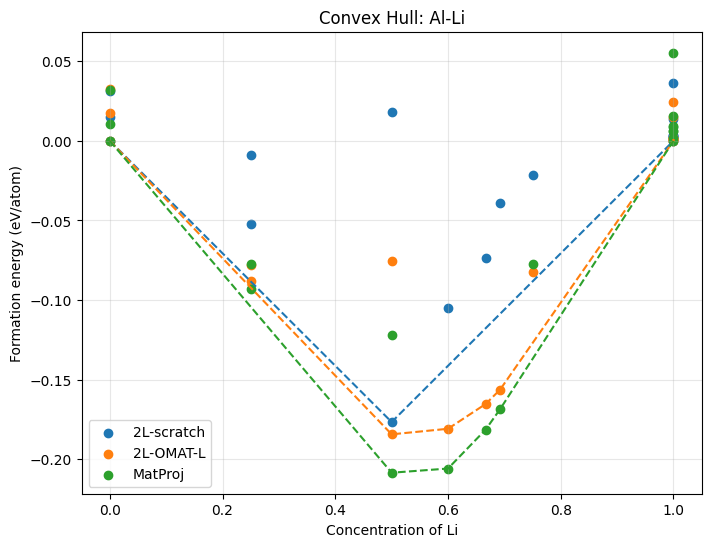

In [19]:
plot_convex_hull({"2L-scratch":df, "2L-OMAT-L":df_fm, "MatProj": ref_df})